EDA and train and fit for Titanic dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
#Reading train dataset

df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\titanic\train.csv', sep=',')
print(df.shape)
print(df.columns)
df.set_index('PassengerId', inplace=True)
df.head()


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
#number of people survived. 1 for survival and 0 for not survival
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [78]:
#Out of 891 how many male and female members
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [79]:
#survival count based on gender. o
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [80]:
#Provide how many non-null values and datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [39]:
#describe the quantitative feature
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.dtypes #datatype of each feature

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [106]:
#Drop Name, ticket column as these columns are not useful for predictions
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

#checking survival rate based on Embarked column
print(df.groupby('Survived').Embarked.value_counts(), '\n')
print(df.Embarked.unique(), '\n')
print(df.Embarked.isnull().sum(), '\n')

# replacing 2 NaN into S, as S is the most occured value
df.Embarked.replace(np.nan, 'S', inplace=True)


Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64 

['S' 'C' 'Q' nan] 

2 



In [113]:
#Embarked has nominal values, so creating dummy variables
dummy_emb = pd.get_dummies(df.Embarked)
dummy_emb.head()
dummy_emb.columns = ['col1','col2','col3']
dummy_emb.drop(['col3'], axis=1, inplace=True)

# drop Embarked colum as we created dummy variable 
del df['Embarked']

#concatenate dummy variables into df
df = pd.concat([df, dummy_emb], axis=1)
df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,col1,col2
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0,0
2,1,1,female,38.0,1,0,71.2833,1,0
3,1,3,female,26.0,0,0,7.9250,0,0
4,1,1,female,35.0,1,0,53.1000,0,0
5,0,3,male,35.0,0,0,8.0500,0,0


In [149]:
#take mean and std deviation of age column, generate random numbers in that range and replace them with NaN 
mean1 = df.Age.mean()
std1 = df.Age.std()
null1 = df.Age.isnull().sum()


rand1 = np.random.randint(mean1-std1,mean1+std1, size=null1 )


0

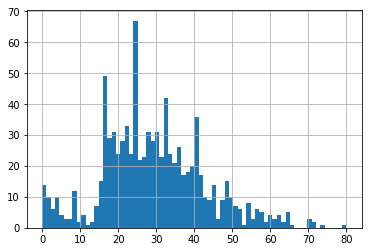

In [154]:
#drop all null values, and convert to int and draw histogram

df['Age'].dropna().astype(int).hist(bins=70)

# fill NaN values in Age column with random values generated
df["Age"][np.isnan(df["Age"])] = rand1
df.Age.isnull().sum()



In [155]:
#convert age column type float into int
df['Age'] = df['Age'].astype(int)

In [156]:
#survival count between age below 15
df[(df['Age'] >=15) & df['Survived'] ==1]
print(len(df[(df['Age'] >= 15) & df['Survived'] ==1]))

#survival count between age group 15-25
df[(df['Age'] > 15) & (df['Age']< 25) & df['Survived'] ==1]
print(len(df[(df['Age'] > 15) & (df['Age']< 25) & df['Survived'] ==1]))


#survival count between age group 25-35
df[(df['Age'] > 25) & (df['Age']< 35) & df['Survived'] ==1]
print(len(df[(df['Age'] > 25) & (df['Age']< 35) & df['Survived'] ==1]))

#survival count between age group 35-45
df[(df['Age'] > 35) & (df['Age']< 45) & df['Survived'] ==1]
print(len(df[(df['Age'] > 35) & (df['Age']< 45) & df['Survived'] ==1]))

#survival count between age group above 45
df[(df['Age'] > 45) & df['Survived'] ==1]
print(len(df[(df['Age'] > 45) & df['Survived'] ==1]))




297
89
85
55
38


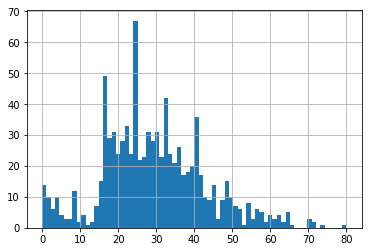

In [157]:
# plot new age column
df.Age.hist(bins=70)

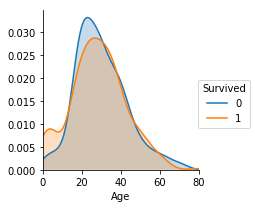

In [169]:
#plot for number people survived or not based on age group

facet = sns.FacetGrid(df, hue="Survived")
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

In [176]:
#convert sex column into numeric.. 1 for male and 2 for female
df.Sex.replace(('male','female'), (1,2), inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,col1,col2
PassengerId,,,,,,,,,
1,0,3,1,22,1,0,7.2500,0,0
2,1,1,2,38,1,0,71.2833,1,0
3,1,3,2,26,0,0,7.9250,0,0
4,1,1,2,35,1,0,53.1000,0,0
5,0,3,1,35,0,0,8.0500,0,0


In [185]:
y = df['Survived']
X = df.loc[:,'Pclass':'col2']


In [202]:
#training model using cross validation for Random forest classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf = RandomForestClassifier()
print('Accuracy is :', (cross_val_score(rf, X,y, cv=10, scoring='accuracy').mean())*100)



Accuracy is : 80.26432868005901
